# Detecting OMxPSG t-shirts with composed model

This model is composed by two step. First, we detect t-shits with the Viola-Jones algorithm. From the t-shirt detection, we extract the ROI (region of interest), in this case the bounding boxes of the t-shirt. The second step is the classification with the model trained with transfer learning, we predict the class inside the ROI.

This approach does not work well. The reason for it is simple, a bad Haar cascade classify. The training of the Haar cascade takes a considerable time and, we must seek the best parameter for detect, it can take your time. In addition, there's other methods that are more efficient and fast than Viola-Jones algorithm. I present this approach as part of my training. But, if you have a good cascade classifier, you can use this composed method.

**Test set**

To test the model, we consider real images that contains t-shirts from both teams.

## Importing libraries

In [11]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2
from os import listdir, path
from imutils import paths

## Setting the models

In [89]:
pos_set =  path.abspath("test") # path to the positive images
cascade = "tshirt_cascade.xml" # path to the cascade xml file
CNN = "omxpsg.h5"

In [90]:
tshirt_cascade = cv2.CascadeClassifier(cascade) # defining the t-shirt detector
model = load_model(CNN) # defining the classification model

## List of image on the test set

In [56]:
pos_list = list(paths.list_images(pos_set)) # making a list with the posite images

## Detection function

- Detect t-shirts with detectMultiScale
- Extract the ROI (region of interest)
- Resize the ROI into (224,224) the VGG16 input size
- Expand the dimensions of the ROI array to proceed with the classification
- Convert the ROI into RBG channels
- Make prediction with the trained model
- Print out the box with the predicted label

In [95]:
def detect(gray, frame):
    
    # before detection with cascade, the image must be in gray scale
    tshirt =  tshirt_cascade.detectMultiScale(gray, 3., 50,
                                             minSize=(100, 100),
                                             flags=cv2.CASCADE_SCALE_IMAGE)    
    
    for (x, y, w, h) in tshirt:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (224, 224))
        roi_gray = roi_gray.astype("float") /255.
        roi_gray = img_to_array(roi_gray)
        roi_gray = cv2.cvtColor(roi_gray, cv2.COLOR_GRAY2RGB)
        roi_gray = np.expand_dims(roi_gray, axis=0)   
        roi_gray = np.expand_dims(roi_gray, axis=0)  
        roi_color = cv2.resize(roi_color, (224, 224))
        roi_color = roi_color.astype("float") / 255.
        roi_gray = img_to_array(roi_color)
        roi_color = np.expand_dims(roi_color, axis=0)
        pred = model.predict(roi_color)
        label = "PSG" if pred > 0.5 else "OM"
        cv2.putText(frame, label, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)   
        
    return frame

## Visualizing the detections

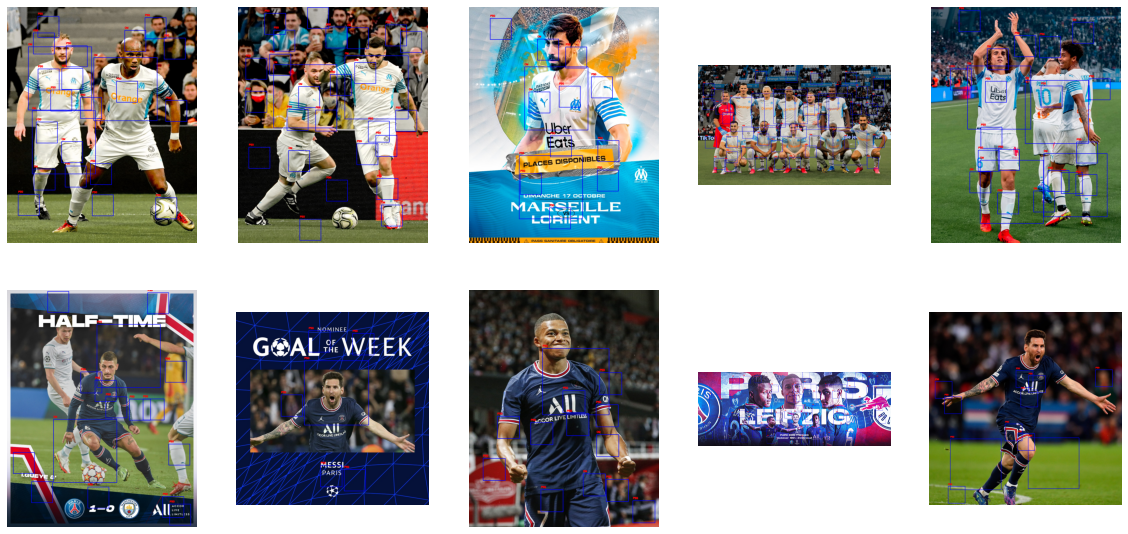

In [96]:
count = 1
plt.figure(figsize=(20, 20))
for i in pos_list:
    image = cv2.imread(i)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, image)
    ax = plt.subplot(4, 5, count)
    plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    count += 1
plt.show() 


## Conclusion

This method is definitely unpractical for real time object detection. The classification model trained with VGG16 using the weights from ImageNet dataset works well, the problem here is the cascade classifier. As we can see, there's several false positive detection, and also, among the detection, we do not have a good detection for t-shirts. 

Evidently the model can be improved, with more images to train the Haar cascade and, tuning the parameters during the training. We must keep in mind, we have more efficient methods for object detection tasks. I've tried this approach for a smile detection. The results was pretty nice, due to have a good face detector, the classification is always easy to lead, because we can use transfer learning. Maybe I'll try to fine tuning this classify to improve the results, but for the moment, I share my experience.